In [73]:
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D,GlobalAveragePooling2D
#from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
#from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
K.set_image_data_format('channels_last')
#from tensorflow.keras.models import model_from_json
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
import PIL
#import json
import tensorflow.keras
from keras_vggface.vggface import VGGFace
#from keras.utils.layer_utils import get_source_inputs
from keras_vggface import utils
import deepface
from deepface import DeepFace
import cv2

%matplotlib inline
#%load_ext autoreload
#%autoreload 2


In [74]:
#json_file = open('model.json', 'r')
#l#oaded_model_json = json_file.read()
#js#on_file.close()
#model = model_from_json(loaded_model_json)
#model.load_weights('model.h5')

from keras_vggface.vggface import VGGFace

#model = tf.keras.models.load_model('facenet_keras.h5',custom_objects={'CustomLayer': CustomLayer})
# same as the following
#model = VGGFace(model='vgg16',input_shape=(224,224,3),include_top=False) # vgg16 as default

model = DeepFace.build_model("Facenet512")


In [75]:
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [76]:
print(tf.version.VERSION)

2.11.0


In [77]:
def newmodel():
   
    x= model.output
    

   # x = Dense(1024, activation='relu')(x)
   # x = Dense(1024, activation='relu')(x)
   # x = Dense(512, activation='relu')(x)
    

# final layer with softmax activation
    #preds = Dense(3,activation='softmax')(x)
    
    newmodel=Model(model.input,x)
    return newmodel

In [78]:
model_new=newmodel()

In [79]:
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)         (None, 79, 79, 32)   864         ['input_1[0][0]']                
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (Batch  (None, 79, 79, 32)  96          ['Conv2d_1a_3x3[0][0]']          
 Normalization)                                                                                   
                                                                                            

 on)                                                                                              
                                                                                                  
 Block35_1_Branch_1_Conv2d_0a_1  (None, 17, 17, 32)  0           ['Block35_1_Branch_1_Conv2d_0a_1x
 x1_Activation (Activation)                                      1_BatchNorm[0][0]']              
                                                                                                  
 Block35_1_Branch_2_Conv2d_0b_3  (None, 17, 17, 32)  0           ['Block35_1_Branch_2_Conv2d_0b_3x
 x3_Activation (Activation)                                      3_BatchNorm[0][0]']              
                                                                                                  
 Block35_1_Branch_0_Conv2d_1x1   (None, 17, 17, 32)  8192        ['Conv2d_4b_3x3_Activation[0][0]'
 (Conv2D)                                                        ]                                
          

                                                                                                  
 Block35_2_Branch_0_Conv2d_1x1   (None, 17, 17, 32)  8192        ['Block35_1_Activation[0][0]']   
 (Conv2D)                                                                                         
                                                                                                  
 Block35_2_Branch_1_Conv2d_0b_3  (None, 17, 17, 32)  9216        ['Block35_2_Branch_1_Conv2d_0a_1x
 x3 (Conv2D)                                                     1_Activation[0][0]']             
                                                                                                  
 Block35_2_Branch_2_Conv2d_0c_3  (None, 17, 17, 32)  9216        ['Block35_2_Branch_2_Conv2d_0b_3x
 x3 (Conv2D)                                                     3_Activation[0][0]']             
                                                                                                  
 Block35_2

 Block35_3_Branch_2_Conv2d_0c_3  (None, 17, 17, 32)  9216        ['Block35_3_Branch_2_Conv2d_0b_3x
 x3 (Conv2D)                                                     3_Activation[0][0]']             
                                                                                                  
 Block35_3_Branch_0_Conv2d_1x1_  (None, 17, 17, 32)  96          ['Block35_3_Branch_0_Conv2d_1x1[0
 BatchNorm (BatchNormalization)                                  ][0]']                           
                                                                                                  
 Block35_3_Branch_1_Conv2d_0b_3  (None, 17, 17, 32)  96          ['Block35_3_Branch_1_Conv2d_0b_3x
 x3_BatchNorm (BatchNormalizati                                  3[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block35_3

 x3_BatchNorm (BatchNormalizati                                  3[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block35_4_Branch_2_Conv2d_0c_3  (None, 17, 17, 32)  96          ['Block35_4_Branch_2_Conv2d_0c_3x
 x3_BatchNorm (BatchNormalizati                                  3[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block35_4_Branch_0_Conv2d_1x1_  (None, 17, 17, 32)  0           ['Block35_4_Branch_0_Conv2d_1x1_B
 Activation (Activation)                                         atchNorm[0][0]']                 
                                                                                                  
 Block35_4

 Block35_5_Branch_0_Conv2d_1x1_  (None, 17, 17, 32)  0           ['Block35_5_Branch_0_Conv2d_1x1_B
 Activation (Activation)                                         atchNorm[0][0]']                 
                                                                                                  
 Block35_5_Branch_1_Conv2d_0b_3  (None, 17, 17, 32)  0           ['Block35_5_Branch_1_Conv2d_0b_3x
 x3_Activation (Activation)                                      3_BatchNorm[0][0]']              
                                                                                                  
 Block35_5_Branch_2_Conv2d_0c_3  (None, 17, 17, 32)  0           ['Block35_5_Branch_2_Conv2d_0c_3x
 x3_Activation (Activation)                                      3_BatchNorm[0][0]']              
                                                                                                  
 Block35_5_Concatenate (Concate  (None, 17, 17, 96)  0           ['Block35_5_Branch_0_Conv2d_1x1_A
 nate)    

 Block17_1_Branch_1_Conv2d_0a_1  (None, 8, 8, 128)   0           ['Block17_1_Branch_1_Conv2d_0a_1x
 x1_Activation (Activation)                                      1_BatchNorm[0][0]']              
                                                                                                  
 Block17_1_Branch_1_Conv2d_0b_1  (None, 8, 8, 128)   114688      ['Block17_1_Branch_1_Conv2d_0a_1x
 x7 (Conv2D)                                                     1_Activation[0][0]']             
                                                                                                  
 Block17_1_Branch_1_Conv2d_0b_1  (None, 8, 8, 128)   384         ['Block17_1_Branch_1_Conv2d_0b_1x
 x7_BatchNorm (BatchNormalizati                                  7[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block17_1

 Block17_2_Branch_2_Conv2d_0c_7  (None, 8, 8, 128)   0           ['Block17_2_Branch_2_Conv2d_0c_7x
 x1_Activation (Activation)                                      1_BatchNorm[0][0]']              
                                                                                                  
 Block17_2_Concatenate (Concate  (None, 8, 8, 256)   0           ['Block17_2_Branch_0_Conv2d_1x1_A
 nate)                                                           ctivation[0][0]',                
                                                                  'Block17_2_Branch_2_Conv2d_0c_7x
                                                                 1_Activation[0][0]']             
                                                                                                  
 Block17_2_Conv2d_1x1 (Conv2D)  (None, 8, 8, 896)    230272      ['Block17_2_Concatenate[0][0]']  
                                                                                                  
 lambda_6 

 x7 (Conv2D)                                                     1_Activation[0][0]']             
                                                                                                  
 Block17_4_Branch_4_Conv2d_0b_1  (None, 8, 8, 128)   384         ['Block17_4_Branch_4_Conv2d_0b_1x
 x7_BatchNorm (BatchNormalizati                                  7[0][0]']                        
 on)                                                                                              
                                                                                                  
 Block17_4_Branch_4_Conv2d_0b_1  (None, 8, 8, 128)   0           ['Block17_4_Branch_4_Conv2d_0b_1x
 x7_Activation (Activation)                                      7_BatchNorm[0][0]']              
                                                                                                  
 Block17_4_Branch_0_Conv2d_1x1   (None, 8, 8, 128)   114688      ['Block17_3_Activation[0][0]']   
 (Conv2D) 

 nate)                                                           ctivation[0][0]',                
                                                                  'Block17_5_Branch_5_Conv2d_0c_7x
                                                                 1_Activation[0][0]']             
                                                                                                  
 Block17_5_Conv2d_1x1 (Conv2D)  (None, 8, 8, 896)    230272      ['Block17_5_Concatenate[0][0]']  
                                                                                                  
 lambda_9 (Lambda)              (None, 8, 8, 896)    0           ['Block17_5_Conv2d_1x1[0][0]']   
                                                                                                  
 add_9 (Add)                    (None, 8, 8, 896)    0           ['Block17_4_Activation[0][0]',   
                                                                  'lambda_9[0][0]']               
          

 on)                                                                                              
                                                                                                  
 Block17_7_Branch_7_Conv2d_0b_1  (None, 8, 8, 128)   0           ['Block17_7_Branch_7_Conv2d_0b_1x
 x7_Activation (Activation)                                      7_BatchNorm[0][0]']              
                                                                                                  
 Block17_7_Branch_0_Conv2d_1x1   (None, 8, 8, 128)   114688      ['Block17_6_Activation[0][0]']   
 (Conv2D)                                                                                         
                                                                                                  
 Block17_7_Branch_7_Conv2d_0c_7  (None, 8, 8, 128)   114688      ['Block17_7_Branch_7_Conv2d_0b_1x
 x1 (Conv2D)                                                     7_Activation[0][0]']             
          

 Block17_8_Conv2d_1x1 (Conv2D)  (None, 8, 8, 896)    230272      ['Block17_8_Concatenate[0][0]']  
                                                                                                  
 lambda_12 (Lambda)             (None, 8, 8, 896)    0           ['Block17_8_Conv2d_1x1[0][0]']   
                                                                                                  
 add_12 (Add)                   (None, 8, 8, 896)    0           ['Block17_7_Activation[0][0]',   
                                                                  'lambda_12[0][0]']              
                                                                                                  
 Block17_8_Activation (Activati  (None, 8, 8, 896)   0           ['add_12[0][0]']                 
 on)                                                                                              
                                                                                                  
 Block17_9

                                                                                                  
 Block17_10_Branch_0_Conv2d_1x1  (None, 8, 8, 128)   114688      ['Block17_9_Activation[0][0]']   
  (Conv2D)                                                                                        
                                                                                                  
 Block17_10_Branch_10_Conv2d_0c  (None, 8, 8, 128)   114688      ['Block17_10_Branch_10_Conv2d_0b_
 _7x1 (Conv2D)                                                   1x7_Activation[0][0]']           
                                                                                                  
 Block17_10_Branch_0_Conv2d_1x1  (None, 8, 8, 128)   384         ['Block17_10_Branch_0_Conv2d_1x1[
 _BatchNorm (BatchNormalization                                  0][0]']                          
 )                                                                                                
          

 3 (Conv2D)                                                      _Activation[0][0]']              
                                                                                                  
 Mixed_7a_Branch_0_Conv2d_1a_3x  (None, 3, 3, 384)   1152        ['Mixed_7a_Branch_0_Conv2d_1a_3x3
 3_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)                                                                                               
                                                                                                  
 Mixed_7a_Branch_1_Conv2d_1a_3x  (None, 3, 3, 256)   768         ['Mixed_7a_Branch_1_Conv2d_1a_3x3
 3_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)                                                                                               
                                                                                                  
 Mixed_7a_

 add_15 (Add)                   (None, 3, 3, 1792)   0           ['Mixed_7a[0][0]',               
                                                                  'lambda_15[0][0]']              
                                                                                                  
 Block8_1_Activation (Activatio  (None, 3, 3, 1792)  0           ['add_15[0][0]']                 
 n)                                                                                               
                                                                                                  
 Block8_2_Branch_2_Conv2d_0a_1x  (None, 3, 3, 192)   344064      ['Block8_1_Activation[0][0]']    
 1 (Conv2D)                                                                                       
                                                                                                  
 Block8_2_Branch_2_Conv2d_0a_1x  (None, 3, 3, 192)   576         ['Block8_2_Branch_2_Conv2d_0a_1x1
 1_BatchNo

 Block8_3_Branch_3_Conv2d_0c_3x  (None, 3, 3, 192)   110592      ['Block8_3_Branch_3_Conv2d_0b_1x3
 1 (Conv2D)                                                      _Activation[0][0]']              
                                                                                                  
 Block8_3_Branch_0_Conv2d_1x1_B  (None, 3, 3, 192)   576         ['Block8_3_Branch_0_Conv2d_1x1[0]
 atchNorm (BatchNormalization)                                   [0]']                            
                                                                                                  
 Block8_3_Branch_3_Conv2d_0c_3x  (None, 3, 3, 192)   576         ['Block8_3_Branch_3_Conv2d_0c_3x1
 1_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)                                                                                               
                                                                                                  
 Block8_3_

 n)                                                                                               
                                                                                                  
 Block8_5_Branch_5_Conv2d_0a_1x  (None, 3, 3, 192)   344064      ['Block8_4_Activation[0][0]']    
 1 (Conv2D)                                                                                       
                                                                                                  
 Block8_5_Branch_5_Conv2d_0a_1x  (None, 3, 3, 192)   576         ['Block8_5_Branch_5_Conv2d_0a_1x1
 1_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)                                                                                               
                                                                                                  
 Block8_5_Branch_5_Conv2d_0a_1x  (None, 3, 3, 192)   0           ['Block8_5_Branch_5_Conv2d_0a_1x1
 1_Activat

 atchNorm (BatchNormalization)                                   [0]']                            
                                                                                                  
 Block8_6_Branch_1_Conv2d_0c_3x  (None, 3, 3, 192)   576         ['Block8_6_Branch_1_Conv2d_0c_3x1
 1_BatchNorm (BatchNormalizatio                                  [0][0]']                         
 n)                                                                                               
                                                                                                  
 Block8_6_Branch_0_Conv2d_1x1_A  (None, 3, 3, 192)   0           ['Block8_6_Branch_0_Conv2d_1x1_Ba
 ctivation (Activation)                                          tchNorm[0][0]']                  
                                                                                                  
 Block8_6_Branch_1_Conv2d_0c_3x  (None, 3, 3, 192)   0           ['Block8_6_Branch_1_Conv2d_0c_3x1
 1_Activat

In [80]:
#for layer in model_new.layers[:-5]:
#    layer.trainable = False

# train the rest of the layers - 19 onwards
#for layer in model_new.layers[-4:]:
#    layer.trainable = True

In [81]:

def triplet_loss(y_true, y_pred, alpha = 0.2):
   
    
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    
    
   
    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor,positive)),axis=-1)
    
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor,negative)),axis=-1)
  
    basic_loss = tf.add(tf.subtract(pos_dist,neg_dist),alpha)
    
    loss = tf.reduce_sum(tf.maximum(basic_loss,0.0))
    
    
    return loss

In [82]:
FRmodel = model_new

In [83]:
def img_to_encoding(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img = np.around(np.array(img) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)

In [84]:
def img_to_encoding_direct(image, model):
    img_array = np.array(image)

# Resize the image to the desired dimensions
    target_size = (160, 160)
    img_resized = cv2.resize(img_array, target_size)

# Rescale the pixel values to be between 0 and 1
    img_rescaled = np.around(img_resized / 255.0,decimals=12)

# Create a data generator with optional data augmentation
#    data_generator = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=False, fill_mode='nearest')

# Expand the dimensions of the image to match the input shape of the model
    img_expanded = np.expand_dims(img_rescaled, axis=0)
    

# Apply data augmentation to the image
#    img_augmented = data_generator.flow(img_expanded, batch_size=1)[0][0]

# Use the preprocessed image in the model
#    model.predict(img_augmented)
    embedding=model.predict_on_batch(img_expanded)
    return embedding / np.linalg.norm(embedding, ord=2)

In [85]:
danielle = tf.keras.preprocessing.image.load_img("images/danielle.png", target_size=(160, 160))
kian = tf.keras.preprocessing.image.load_img("images/kian.jpg", target_size=(160, 160))
Abhishek_Akash= tf.keras.preprocessing.image.load_img("images/Abhishek_Akash.jpg", target_size=(160, 160))

In [86]:
np.around(np.array(kian) / 255.0, decimals=12).shape

(160, 160, 3)

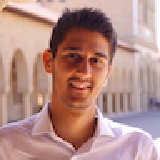

In [87]:
kian

In [88]:
np.around(np.array(danielle) / 255.0, decimals=12).shape

(160, 160, 3)

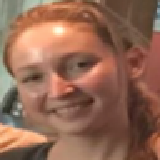

In [89]:
danielle

In [90]:
np.around(np.array(Abhishek_Akash) / 255.0, decimals=12).shape

(160, 160, 3)

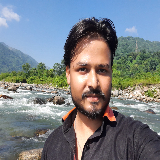

In [91]:
Abhishek_Akash

In [92]:
database = {}
database["danielle"] = img_to_encoding("images/danielle.png", FRmodel)
database["younes"] = img_to_encoding("images/younes.jpg", FRmodel)
database["tian"] = img_to_encoding("images/tian.jpg", FRmodel)
database["andrew"] = img_to_encoding("images/andrew.jpg", FRmodel)
database["kian"] = img_to_encoding("images/kian.jpg", FRmodel)
database["dan"] = img_to_encoding("images/dan.jpg", FRmodel)
database["sebastiano"] = img_to_encoding("images/sebastiano.jpg", FRmodel)
database["bertrand"] = img_to_encoding("images/bertrand.jpg", FRmodel)
database["kevin"] = img_to_encoding("images/kevin.jpg", FRmodel)
database["felix"] = img_to_encoding("images/felix.jpg", FRmodel)
database["benoit"] = img_to_encoding("images/benoit.jpg", FRmodel)
database["arnaud"] = img_to_encoding("images/arnaud.jpg", FRmodel)
database["Abhishek Ambast"]=img_to_encoding("images/Abhishek_Ambast.jpg",FRmodel)
database["Aya Farag Kazeem"]=img_to_encoding("images/Bona.jpg",FRmodel)
database["Shrija"]=img_to_encoding("images/Shrija.jpg",FRmodel)
database["Abhishek Akash"]=img_to_encoding("images/Abhishek_Akash.jpg",FRmodel)

In [93]:
def verify(image_path, identity, database, model):
   
    encoding = img_to_encoding(image_path,model)
   
    dist = np.linalg.norm(database[identity]-encoding)
    
    if dist<0.85:
        print("It's " + str(identity) + ", welcome in!")
        door_open = True
    else:
        print("It's not " + str(identity) + ", please go away")
        door_open = False
       
    return dist, door_open

In [94]:
distance, door_open_flag = verify("images/camera_0.jpg", "younes", database, FRmodel)
print(distance)

print("(", distance, ",", door_open_flag, ")")

It's younes, welcome in!
0.53951526
( 0.53951526 , True )


In [95]:
verify("images/camera_2.jpg", "kian", database, FRmodel)

It's not kian, please go away


(1.3517835, False)

In [96]:
def who_is_it(image_path, database, model):
   
    

   
    encoding =  img_to_encoding(image_path,model)
    
   
    min_dist = 1000
    
   
    for (name, db_enc) in database.items():
        dist = np.linalg.norm(db_enc-encoding)
        if dist<min_dist:
            min_dist = dist
            identity = name
  
    
    if min_dist > 0.85:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

In [97]:
def who_is_it_direct(image, database, model):
   
    

   
    encoding =  img_to_encoding_direct(image,model)
    
   
    min_dist = 1000
    
   
    for (name, db_enc) in database.items():
        dist = np.linalg.norm(db_enc-encoding)
        if dist<min_dist:
            min_dist = dist
            identity = name
  
    
    if min_dist > 0.85:
        print("Not in the database.")
        identity="Unidentified";
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

In [98]:
who_is_it("images/camera_0.jpg", database, FRmodel)

it's younes, the distance is 0.53951526


(0.53951526, 'younes')

In [99]:
 who_is_it("images/younes.jpg", database, FRmodel)

it's younes, the distance is 0.0


(0.0, 'younes')

In [100]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [101]:
video_capture = cv2.VideoCapture(0)

You can also provide a filename here, and Python will read in the video file. However, you need to have ffmpeg installed for that since OpenCV itself cannot decode compressed video. Ffmpeg acts as the front end for OpenCV, and, ideally, it should be compiled directly into OpenCV. This is not easy to do, especially on Windows.

In [102]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
video_capture = cv2.VideoCapture(0)


while True:
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    k=0
    for (x, y, w, h) in faces:
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        face = frame[y:y+h, x:x+w]
        min_dist, identity=who_is_it_direct(face,database,FRmodel)
        
        if(identity==-1 and k==10):
            break
        
       
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, f'ID: {identity}, Conf: {min_dist:.2f}', (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 255, 0), 2)
        k+=1
    cv2.imshow('Face Recoginition', frame)
    
    key=cv2.waitKey(1) & 0xFF 
    
    if key==ord(' '):
        break

video_capture.release()
cv2.destroyAllWindows()

it's Abhishek Ambast, the distance is 0.68871737
it's Abhishek Ambast, the distance is 0.6882739
it's Abhishek Ambast, the distance is 0.69412297
it's Abhishek Ambast, the distance is 0.69746405
it's Abhishek Ambast, the distance is 0.6893987
it's Abhishek Ambast, the distance is 0.6637628
it's Abhishek Ambast, the distance is 0.6838515
it's Abhishek Ambast, the distance is 0.7112031
it's Abhishek Ambast, the distance is 0.7275779
it's Abhishek Ambast, the distance is 0.73514616
it's Abhishek Ambast, the distance is 0.7116758
it's Abhishek Ambast, the distance is 0.6929291
it's Abhishek Ambast, the distance is 0.70831186
it's Abhishek Ambast, the distance is 0.68961316
it's Abhishek Ambast, the distance is 0.6988166
it's Abhishek Ambast, the distance is 0.69431657
it's Abhishek Ambast, the distance is 0.68985987
it's Abhishek Ambast, the distance is 0.68757844
it's Abhishek Ambast, the distance is 0.7009469
it's Abhishek Ambast, the distance is 0.69611615
it's Abhishek Ambast, the dist

In this, cv2.waitKey() is used to wait for a key event inside the loop that reads and displays frames from the video. The method returns the ASCII value of the key that was pressed, which is then compared to the ASCII value of the 'q' key using the ord() function. If the 'q' key was pressed, the loop is exited using the break statement, and the video capture object is released and the display window is closed.

Note that the & 0xFF operation is used to mask the key value with 0xFF, which ensures that only the least significant 8 bits (i.e., the ASCII value of the key) are used for the comparison. This is necessary because cv2.waitKey() may return a 32-bit value in some platforms.